In [129]:
# Importing the required packages here
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from wordcloud import WordCloud

In [130]:
#### reading wine data from csv file

df = pd.read_csv("EdX_2013_Academic_Year_Courses.csv",encoding = 'unicode_escape')

df.head()

C:\Users\chomeyd01\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,course_id,Course Short Title,Course Long Title,userid_DI,registered,viewed,explored,certified,Country,LoE_DI,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,HeroesX,The Ancient Greek Hero,MHxPC130442623,1,0,0,0,United States,NaN,...,0,19/12/2012,17/11/2013,NaN,9.0,NaN,NaN,0,NaN,1.0
1,HarvardX/CB22x/2013_Spring,HeroesX,The Ancient Greek Hero,MHxPC130275857,1,0,0,0,United States,NaN,...,0,08/02/2013,17/11/2013,NaN,16.0,NaN,NaN,0,NaN,1.0
2,HarvardX/CB22x/2013_Spring,HeroesX,The Ancient Greek Hero,MHxPC130539455,1,1,0,0,France,NaN,...,0,01/01/2013,14/05/2013,42.0,6.0,NaN,3.0,0,NaN,NaN
3,HarvardX/CB22x/2013_Spring,HeroesX,The Ancient Greek Hero,MHxPC130088379,1,1,0,0,United States,NaN,...,0,18/02/2013,17/03/2013,70.0,3.0,NaN,3.0,0,NaN,NaN
4,HarvardX/CB22x/2013_Spring,HeroesX,The Ancient Greek Hero,MHxPC130024894,1,1,0,0,United States,NaN,...,0.07,24/01/2013,03/08/2013,175.0,9.0,NaN,7.0,0,NaN,NaN


In [131]:
#To check for any duplicated rows
df.duplicated().sum() 

0

In [25]:
#check datatypes
print(df.dtypes)

course_id              object
Course Short Title     object
Course Long Title      object
userid_DI              object
registered              int64
viewed                  int64
explored                int64
certified               int64
Country                object
LoE_DI                 object
YoB                   float64
Age                    object
gender                 object
grade                  object
start_time_DI          object
last_event_DI          object
nevents               float64
ndays_act             float64
nplay_video           float64
nchapters             float64
nforum_posts            int64
roles                 float64
incomplete_flag       float64
dtype: object


In [26]:
#Exploring data by selecting different columns to check their make up
df['nplay_video'].unique()
#it was interesting to see age of 2014 so it seems even the Year of birth was NaN and
# also different data types, string and float.
df[df['Age']==2014][['Age','YoB']]
df[df['Age']==2014]['YoB'].unique()
len(df[df['Age']==2014])

df[df['Age']=='#VALUE!']['YoB'].unique() #Also all with #VALUE! in Age as are NaNs 

array([nan])

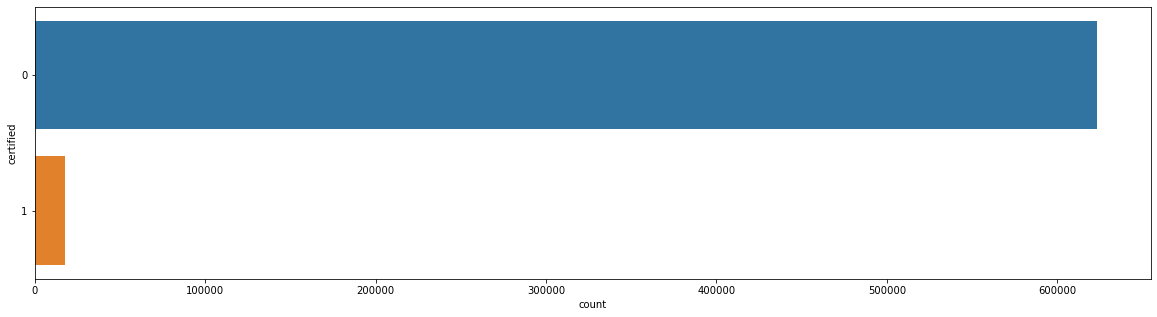

In [27]:
fig = plt.figure(figsize=(20,5))
sns.countplot(y=df['certified'], data=df);

#Majority of registerd students dont get certified.

In [133]:
#drop columns
df.drop(['Course Short Title', 'registered', 'explored', 'viewed', 'YoB', 'roles','incomplete_flag'],axis=1, inplace=True)

#Drop rows without studying activity at all; columns last_event_DI to nforum_posts
df.drop(df[(df['last_event_DI'].isnull()) & (df['nevents'].isnull()) & (df['ndays_act'].isnull()) & 
           (df['nplay_video'].isnull()) & (df['nchapters'].isnull()) & (df['nforum_posts']==0)].index, inplace = True)

# Change the release_date column to DateTime column
df['start_time_DI'] = pd.to_datetime(df['start_time_DI'], format='%d/%m/%Y')
df['last_event_DI'] = pd.to_datetime(df['last_event_DI'], format='%d/%m/%Y')

#create a column of who who offers the course MITx or HarvardX
#for row in df['course_id']:
#    list1 = row.split("/")
#    df['course_by'] =list1[0]

#create duration column
df['duration'] = (df['last_event_DI'] - df['start_time_DI']).dt.days

#create duration_range column
df['duration_range'] = pd.cut(df['duration'], [-500,-1, 0, 10, 20, 50, 100, 300, 1000], 
                   labels=['negatives','0', '0-10','10-20','20-30', '50-100', '100-300', '300+'])

#Replace '#VALUE!' and 2014 age with NaN and Parse age column as numeric before creating age_group
df.replace('#VALUE!', np.nan, inplace=True )
df['Age'] = pd.to_numeric(df['Age'])
df['Age'].replace(2014,np.nan, inplace=True) 

#create duration_range column
df['Age_group'] = pd.cut(df['Age'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90], 
                   labels=['0-9','10-19','20-29', '30-39', '40-49','50-59','60-69','70-79',
                           '80-89'])

#Replace empty string and parse grade column as numeric before creating age_group
df['grade'].replace(' ',"0", inplace=True) 
df['grade'] = pd.to_numeric(df['grade'])

df.head(2)

,course_id,Course Long Title,userid_DI,certified,Country,LoE_DI,Age,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,duration,duration_range,Age_group
0,HarvardX/CB22x/2013_Spring,The Ancient Greek Hero,MHxPC130442623,0,United States,Other,NaN,o,0.0,2012-12-19,2013-11-17,NaN,9.0,NaN,NaN,0,333.0,300+,NaN
1,HarvardX/CB22x/2013_Spring,The Ancient Greek Hero,MHxPC130275857,0,United States,Other,NaN,o,0.0,2013-02-08,2013-11-17,NaN,16.0,NaN,NaN,0,282.0,100-300,NaN


Missing values in each column: 

 course_id                 0
Course Long Title         0
userid_DI                 0
certified                 0
Country                   0
LoE_DI                    0
Age                   86791
gender                    0
grade                 42783
start_time_DI             0
last_event_DI         85601
nevents              105798
ndays_act             69390
nplay_video          364177
nchapters            165400
nforum_posts              0
duration              85601
duration_range        85601
Age_group             86791
dtype: int64 


 Missing values on graph: 


<AxesSubplot:>

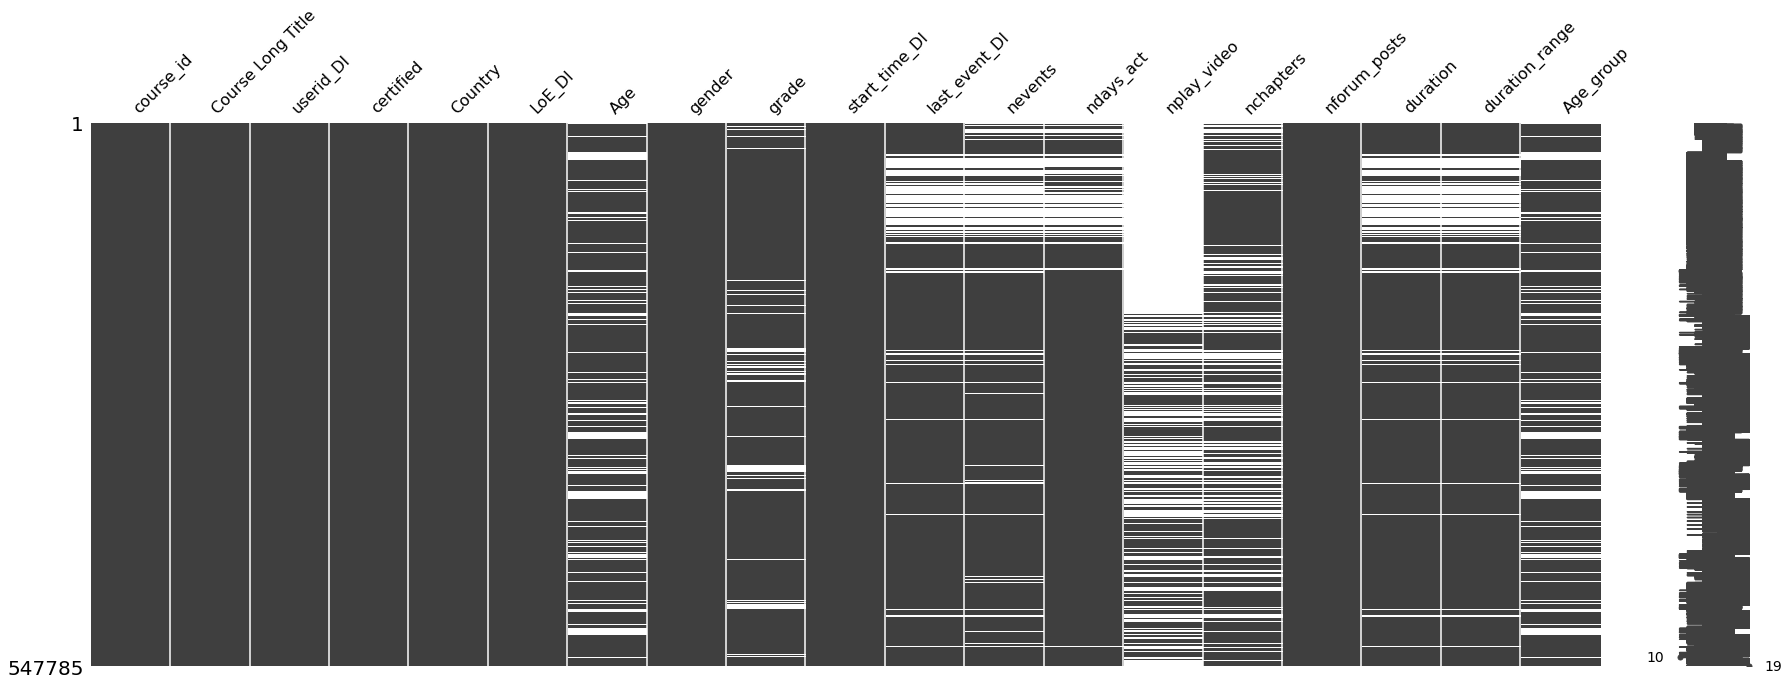

In [134]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
print("Missing values in each column: \n\n", missing_values_count, "\n\n\n Missing values on graph: ")
missingno.matrix(df, figsize = (30,10))

DEALING WITH MISSING VALUES
for columns with string data type, we simply replace NaNs with other

In [135]:
#Replace all with "Other"
df['LoE_DI'].replace(np.NaN,"Other", inplace=True) 
df['gender'].replace(np.NaN,"o", inplace=True)

# replacement as median of different age groups by Sex and Class.
df_grouped = df.groupby(['course_id', 'certified'])

def impute_median(series):
    return series.fillna(series.median())

df.Age = df_grouped['Age'].transform(impute_median)
df.grade = df_grouped['grade'].transform(impute_median)
df.nevents = df_grouped['nevents'].transform(impute_median)
df.ndays_act = df_grouped['ndays_act'].transform(impute_median)
df.nplay_video = df_grouped['nplay_video'].transform(impute_median)
df.nchapters = df_grouped['nchapters'].transform(impute_median)
df.duration = df_grouped['duration'].transform(impute_median)

#The new columns must be recreated given missing values have been dealt with
#recreate duration_range column
df['duration_range'] = pd.cut(df['duration'], [ 0, 10, 20, 50, 100, 300, 1000], 
                   labels=['0-10','10-20','20-30', '50-100', '100-300', '300+'])

#recreate duration_range column
df['Age_group'] = pd.cut(df['Age'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90], 
                   labels=['0-10','10-20','20-30', '30-40', '40-50','50-60','60-70','70-80',
                           '80-90'])
df.isnull().sum()

course_id                 0
Course Long Title         0
userid_DI                 0
certified                 0
Country                   0
LoE_DI                    0
Age                       0
gender                    0
grade                     0
start_time_DI             0
last_event_DI         85601
nevents                   0
ndays_act                 0
nplay_video          193561
nchapters                 0
nforum_posts              0
duration                  0
duration_range       153001
Age_group                 0
dtype: int64

In [136]:
#Some NaNs are left nplay_video because no videos were available for some course_id's so we replace with zero 
df['nplay_video'].replace(np.NaN,0, inplace=True) 


In [137]:
#drop column because it is no longer useful
df.drop(['last_event_DI'],axis=1, inplace=True)

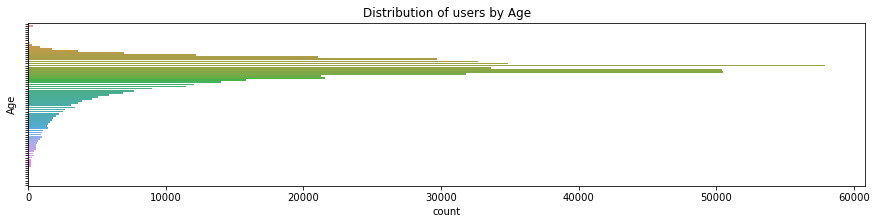

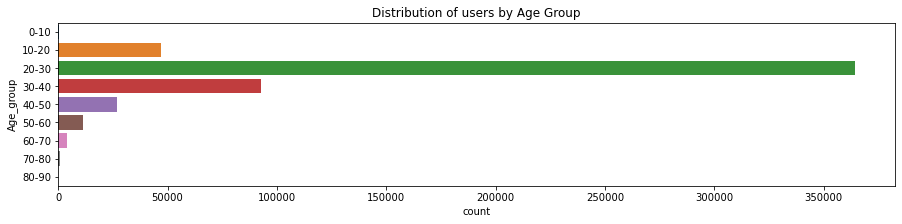

In [115]:
#registered users by age
plot1 = plt.figure(1,figsize=(15,3))
p1 = sns.countplot(y=df['Age'], data=df)
p1.set(yticklabels=[])
p1.set(title='Distribution of users by Age');

plot2 = plt.figure(2,figsize=(15,3))
p2 = sns.countplot(y=df['Age_group'], data=df)
p2.set(title='Distribution of users by Age Group');

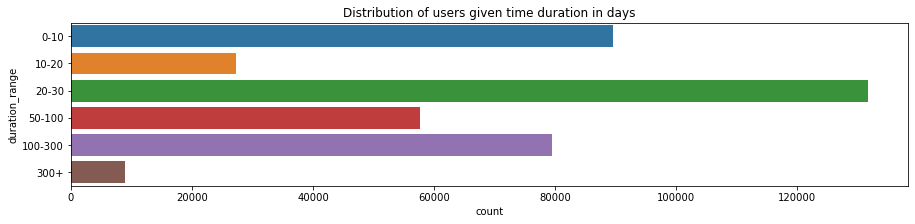

In [113]:
#registered users by time spenton the course in days
plt.figure(figsize=(15,3))
p1 = sns.countplot(y=df['duration_range'], data=df)
p1.set(title='Distribution of users given time duration in days');

C:\Users\chomeyd01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chomeyd01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


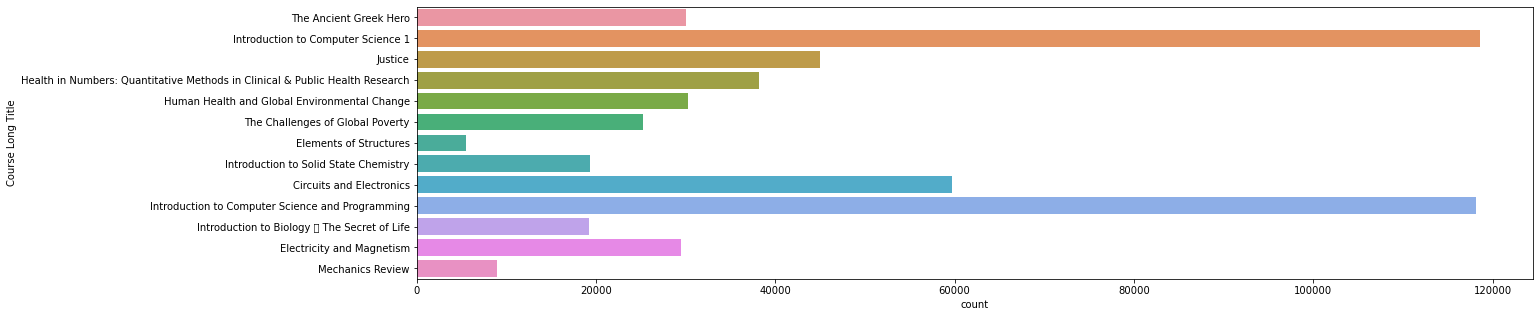

In [35]:
fig = plt.figure(figsize=(20,5))
sns.countplot(y=df['Course Long Title'], data=df);

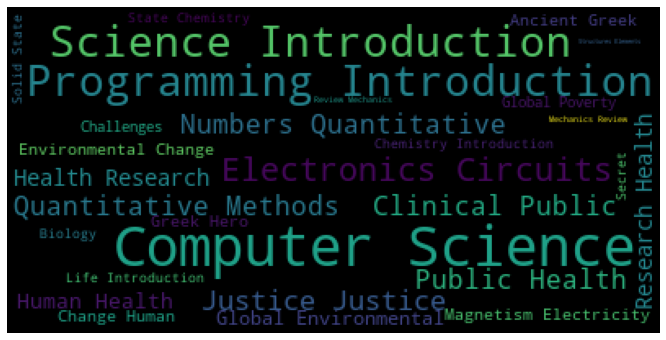

In [110]:
plt.figure(figsize=(12,6))
wordcloud = WordCloud().generate(' '.join(df['Course Long Title']))
plt.imshow(wordcloud)
plt.axis( "off" )
plt.margins(x = 0 , y = 0 )
plt.show()

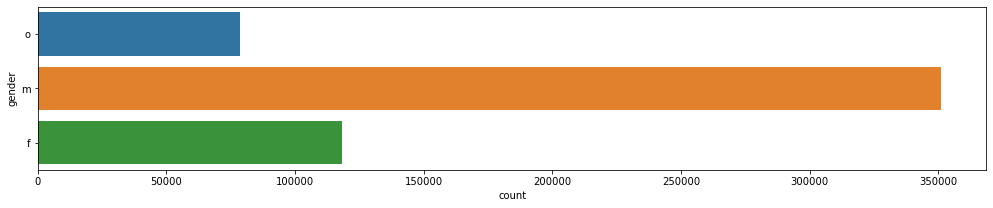

In [36]:
fig = plt.figure(figsize=(17,3))
sns.countplot(y=df['gender'], data=df);

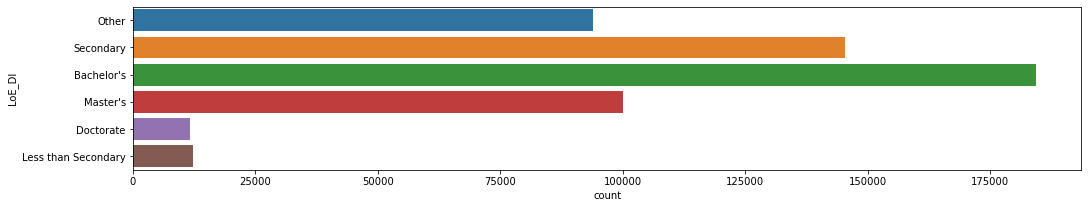

In [98]:
fig = plt.figure(figsize=(17,3))
sns.countplot(y=df['LoE_DI'], data=df);

In [120]:
df[df['certified'] == 1].groupby(by=['Age_group']).agg({'grade': ['mean', 'min', 'max']})

grade            
               mean   min   max
Age_group                      
0-10            NaN   NaN   NaN
10-20      0.806740  0.50  1.00
20-30      0.835474  0.00  1.01
30-40      0.847019  0.50  1.00
40-50      0.848017  0.51  1.00
50-60      0.833007  0.50  1.00
60-70      0.808981  0.53  1.00
70-80      0.807917  0.60  1.00
80-90           NaN   NaN   NaN

In [121]:
df[df['certified'] == 0].groupby(by=['Age_group']).agg({'grade': ['mean', 'min', 'max']})

grade           
               mean  min   max
Age_group                     
0-10       0.003520  0.0  0.35
10-20      0.008489  0.0  0.79
20-30      0.010093  0.0  0.79
30-40      0.009291  0.0  0.79
40-50      0.006955  0.0  0.79
50-60      0.006186  0.0  0.79
60-70      0.007466  0.0  0.67
70-80      0.008547  0.0  0.59
80-90      0.000000  0.0  0.00

In [39]:
df[df['certified'] == 1].groupby(by=['Course Long Title']).agg({'grade': ['mean', 'min', 'max']})

grade            
                                                        mean   min   max
Course Long Title                                                       
Circuits and Electronics                            0.864998  0.50  1.00
Electricity and Magnetism                           0.828309  0.60  1.00
Elements of Structures                              0.805182  0.60  1.00
Health in Numbers: Quantitative Methods in Clin...  0.927595  0.00  1.01
Human Health and Global Environmental Change        0.750436  0.50  0.89
Introduction to Biology  The Secret of Life        0.759392  0.58  0.99
Introduction to Computer Science 1                  1.000000  1.00  1.00
Introduction to Computer Science and Programming    0.802515  0.55  1.00
Introduction to Solid State Chemistry               0.847974  0.60  1.00
Justice                                             0.821228  0.60  1.00
Mechanics Review                                    0.750976  0.59  1.00
The Ancient Greek Hero                              0.733698  0.50  1.00
The Challenges of Global Poverty                    0.787127  0.50  1.00

In [40]:
df[df['certified'] == 0].groupby(by=['Course Long Title']).agg({'grade': ['mean', 'min', 'max']})

grade           
                                                        mean  min   max
Course Long Title                                                      
Circuits and Electronics                            0.010786  0.0  0.59
Electricity and Magnetism                           0.009232  0.0  0.59
Elements of Structures                              0.016777  0.0  0.59
Health in Numbers: Quantitative Methods in Clin...  0.024529  0.0  0.79
Human Health and Global Environmental Change        0.011176  0.0  0.49
Introduction to Biology  The Secret of Life        0.014524  0.0  0.57
Introduction to Computer Science 1                  0.000000  0.0  0.00
Introduction to Computer Science and Programming    0.011637  0.0  0.54
Introduction to Solid State Chemistry               0.009860  0.0  0.59
Justice                                             0.008992  0.0  0.59
Mechanics Review                                    0.015880  0.0  0.58
The Ancient Greek Hero                              0.004130  0.0  0.49
The Challenges of Global Poverty                    0.019140  0.0  0.49

In [118]:
df[df['certified'] == 1].groupby(by=['LoE_DI']).agg({'grade': ['mean', 'min', 'max']})

grade            
                         mean   min   max
LoE_DI                                   
Bachelor's           0.828926  0.50  1.01
Doctorate            0.869147  0.50  1.00
Less than Secondary  0.814179  0.53  1.00
Master's             0.846257  0.50  1.01
Other                0.840546  0.00  1.01
Secondary            0.825973  0.50  1.01

In [119]:
df[df['certified'] == 0].groupby(by=['LoE_DI']).agg({'grade': ['mean', 'min', 'max']})

grade           
                         mean  min   max
LoE_DI                                  
Bachelor's           0.009029  0.0  0.79
Doctorate            0.011978  0.0  0.79
Less than Secondary  0.008771  0.0  0.60
Master's             0.010844  0.0  0.79
Other                0.011313  0.0  0.78
Secondary            0.008096  0.0  0.79

In [122]:
df[df['certified'] == 1].groupby(by=['gender']).agg({'grade': ['mean', 'min', 'max']})

grade           
            mean  min   max
gender                     
f       0.826801  0.5  1.01
m       0.837733  0.5  1.01
o       0.840161  0.0  1.00

In [123]:
df[df['certified'] == 0].groupby(by=['gender']).agg({'grade': ['mean', 'min', 'max']})

grade           
            mean  min   max
gender                     
f       0.011140  0.0  0.79
m       0.008399  0.0  0.79
o       0.012401  0.0  0.78

<function matplotlib.pyplot.show(close=None, block=None)>

C:\Users\chomeyd01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chomeyd01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


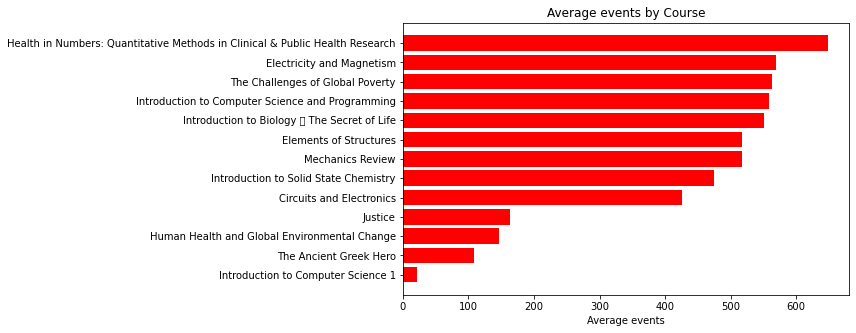

In [42]:
#average events by country
avg_events = df.groupby(by=['Course Long Title'])['nevents'].mean().reset_index()
avg_events = avg_events.sort_values('nevents',ascending=True)

plt.figure(figsize=(8,5))
plt.barh(avg_events['Course Long Title'], avg_events['nevents'], color='red')
plt.xlabel("Average events")
plt.title("Average events by Course")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

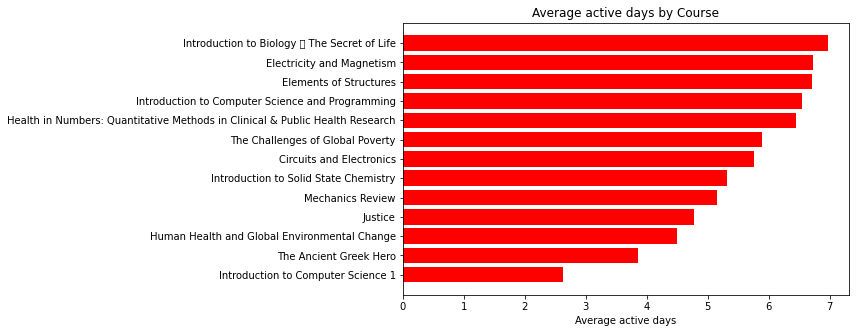

In [43]:
#average active days by course
avg_ndays_act = df.groupby(by=['Course Long Title'])['ndays_act'].mean().reset_index()
avg_ndays_act = avg_ndays_act.sort_values('ndays_act',ascending=True)

plt.figure(figsize=(8,5))
plt.barh(avg_ndays_act['Course Long Title'], avg_ndays_act['ndays_act'], color='red')
plt.xlabel("Average active days")
plt.title("Average active days by Course")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

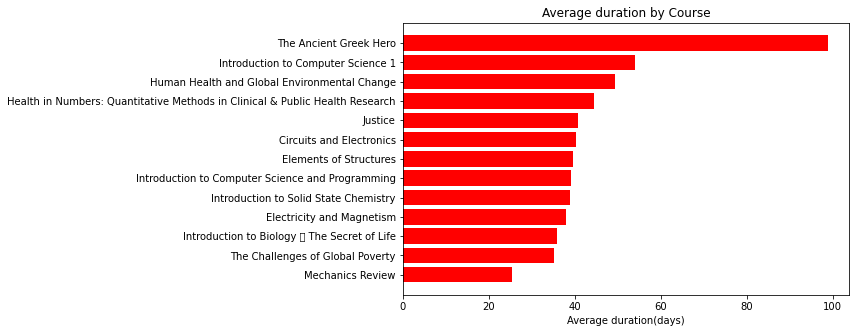

In [44]:
#average duration by course
avg_duration = df.groupby(by=['Course Long Title'])['duration'].mean().reset_index()
avg_duration = avg_duration.sort_values('duration',ascending=True)

plt.figure(figsize=(8,5))
plt.barh(avg_duration['Course Long Title'], avg_duration['duration'], color='red')
plt.xlabel("Average duration(days)")
plt.title("Average duration by Course")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

C:\Users\chomeyd01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chomeyd01\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


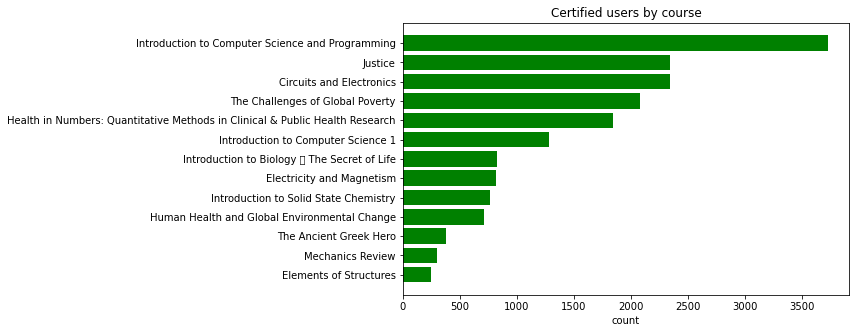

In [56]:
cert_course = df[df['certified']==1].groupby(['Course Long Title']).size().reset_index(name='count')
cert_course = cert_course.sort_values('count',ascending=True)

plt.figure(figsize=(8,5))
plt.barh(cert_course['Course Long Title'], cert_course['count'], color='green')
plt.xlabel("count")
plt.title("Certified users by course")

plt.show

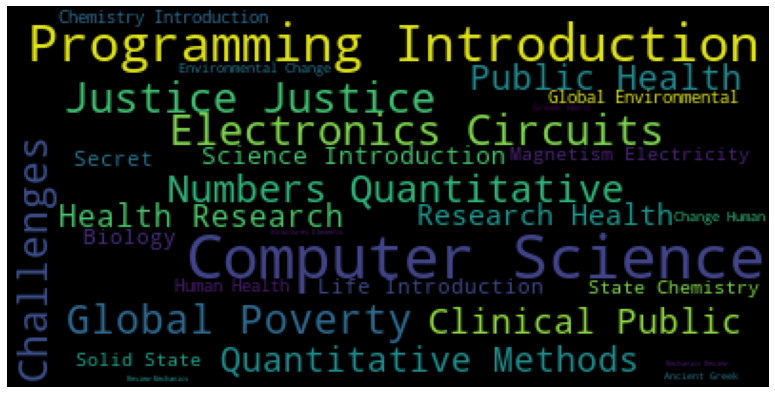

In [108]:
plt.figure(figsize=(15,7))
wordcloud = WordCloud().generate(' '.join(df[df['certified']==1]['Course Long Title']))
plt.imshow(wordcloud)
plt.axis( "off" )
plt.margins(x = 0 , y = 0 )
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

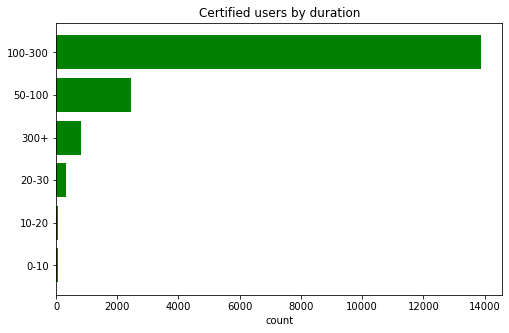

In [124]:
cert_course = df[df['certified']==1].groupby(['duration_range']).size().reset_index(name='count')
cert_course = cert_course.sort_values('count',ascending=True)

plt.figure(figsize=(8,5))
plt.barh(cert_course['duration_range'], cert_course['count'], color='green')
plt.xlabel("count")
plt.title("Certified users by duration")

plt.show

Text(0.5, 1.0, 'Certified users by Level of Education')

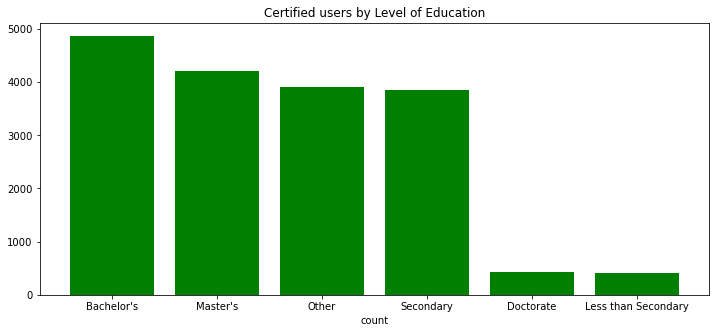

In [126]:
lvl = df[df['certified']==1].groupby(['LoE_DI']).size().reset_index(name='count')
lvl = lvl.sort_values('count',ascending=False)


plt.figure(figsize=(12,5))
plt.bar(lvl['LoE_DI'], lvl['count'], color='green')
plt.xlabel("count")
plt.title("Certified users by Level of Education")


In [75]:
g17 = df[df['certified']==1].groupby(['Course Long Title']).mean()
g17.drop(['certified'],axis=1, inplace=True)
g17

,Age,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,duration
Course Long Title,,,,,,,,
Circuits and Electronics,24.190781,0.864998,5352.866411,51.329065,677.797268,15.973965,0.191208,172.913786
Electricity and Magnetism,25.476886,0.828309,9678.300487,77.873479,1077.004866,19.409976,0.427007,164.159367
Elements of Structures,23.935223,0.805182,5312.834008,47.801619,422.927126,11.987854,0.133603,126.668016
Health in Numbers: Quantitative Methods in Clinical & Public Health Research,31.282845,0.927595,6144.486971,42.617264,1032.038545,14.513572,0.093920,156.383822
Human Health and Global Environmental Change,29.196906,0.750436,1738.516174,21.106892,216.744023,7.794655,0.035162,139.607595
Introduction to Biology  The Secret of Life,29.123937,0.759392,5941.560146,53.889429,697.199271,16.359660,0.516403,129.859052
Introduction to Computer Science 1,29.011655,1.000000,284.079643,34.048174,0.000000,11.468531,0.000000,229.564103
Introduction to Computer Science and Programming,27.609920,0.802515,7953.325201,67.958445,595.566756,16.801877,0.421180,174.572922
Introduction to Solid State Chemistry,24.720779,0.847974,7269.245455,50.848052,782.415584,15.001299,0.072727,172.214286


In [76]:
g1 = df[df['certified']==0].groupby(['Course Long Title']).mean()
g1.drop(['certified'],axis=1, inplace=True)
g1

,Age,grade,nevents,ndays_act,nplay_video,nchapters,nforum_posts,duration
Course Long Title,,,,,,,,
Circuits and Electronics,25.212252,0.010786,224.509048,3.895459,40.189852,2.684584,0.009545,34.908000
Electricity and Magnetism,25.448261,0.009232,308.136750,4.689394,47.112745,2.948157,0.017943,34.448923
Elements of Structures,24.590127,0.016777,292.887649,4.795347,46.228674,2.563079,0.010214,35.548894
Health in Numbers: Quantitative Methods in Clinical & Public Health Research,31.445866,0.024529,369.508928,4.607236,79.189435,2.945962,0.018352,38.813042
Human Health and Global Environmental Change,29.212993,0.011176,109.072252,4.096482,18.054358,2.117053,0.001593,47.304223
Introduction to Biology  The Secret of Life,29.130817,0.014524,309.520610,4.875203,51.965398,2.742597,0.064920,31.783274
Introduction to Computer Science 1,28.729385,0.000000,19.512780,2.287357,0.000000,2.306946,0.000000,52.091049
Introduction to Computer Science and Programming,27.458855,0.011637,317.561787,4.551147,46.286048,2.685633,0.022068,34.727425
Introduction to Solid State Chemistry,25.880870,0.009860,194.106824,3.432617,30.878238,2.298549,0.003976,33.358947


<function matplotlib.pyplot.show(close=None, block=None)>

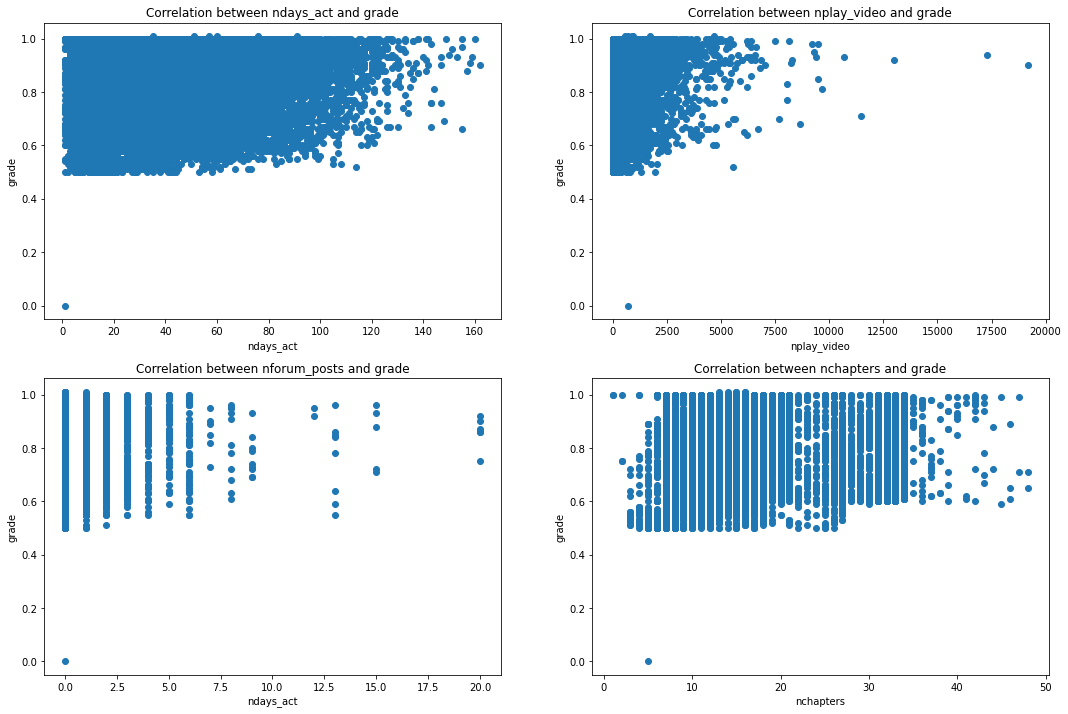

In [45]:
plt.figure(figsize=(18,12))
plt.subplot(2, 2, 1)
plt.scatter(df[df['certified']==1]['ndays_act'], df[df['certified']==1]['grade'])
plt.xlabel("ndays_act")
plt.ylabel("grade")
plt.title("Correlation between ndays_act and grade")
plt.show

plt.subplot(2, 2, 2)
plt.scatter(df[df['certified']==1]['nplay_video'], df[df['certified']==1]['grade'])
plt.xlabel("nplay_video")
plt.ylabel("grade")
plt.title("Correlation between nplay_video and grade")
plt.show

plt.subplot(2, 2, 3)
plt.scatter(df[df['certified']==1]['nforum_posts'], df[df['certified']==1]['grade'])
plt.xlabel("ndays_act")
plt.ylabel("grade")
plt.title("Correlation between nforum_posts and grade")
plt.show

plt.subplot(2, 2, 4)
plt.scatter(df[df['certified']==1]['nchapters'], df[df['certified']==1]['grade'])
plt.xlabel("nchapters")
plt.ylabel("grade")
plt.title("Correlation between nchapters and grade")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

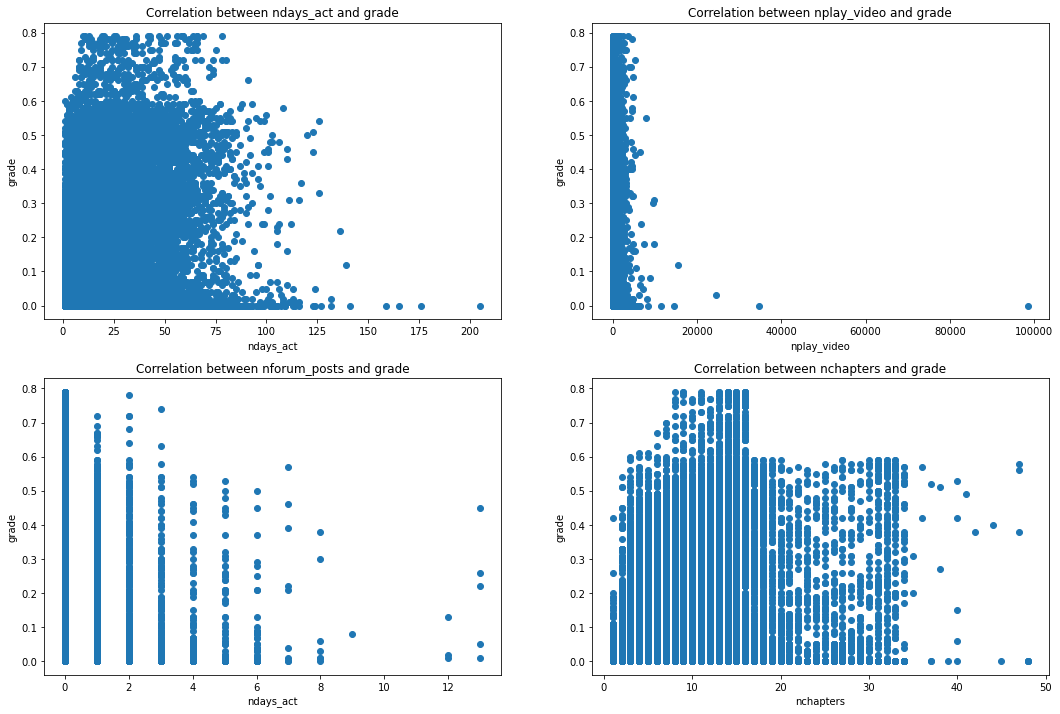

In [46]:
plt.figure(figsize=(18,12))
plt.subplot(2, 2, 1)
plt.scatter(df[df['certified']==0]['ndays_act'], df[df['certified']==0]['grade'])
plt.xlabel("ndays_act")
plt.ylabel("grade")
plt.title("Correlation between ndays_act and grade")
plt.show

plt.subplot(2, 2, 2)
plt.scatter(df[df['certified']==0]['nplay_video'], df[df['certified']==0]['grade'])
plt.xlabel("nplay_video")
plt.ylabel("grade")
plt.title("Correlation between nplay_video and grade")
plt.show

plt.subplot(2, 2, 3)
plt.scatter(df[df['certified']==0]['nforum_posts'], df[df['certified']==0]['grade'])
plt.xlabel("ndays_act")
plt.ylabel("grade")
plt.title("Correlation between nforum_posts and grade")
plt.show

plt.subplot(2, 2, 4)
plt.scatter(df[df['certified']==0]['nchapters'], df[df['certified']==0]['grade'])
plt.xlabel("nchapters")
plt.ylabel("grade")
plt.title("Correlation between nchapters and grade")
plt.show